In this notebook, we split each city up into the portion with above average mental health and below average. Then, we look at which cities nationwide are the most similar to those halves. This gives us an idea of how large the disparity in health is between the city's high and low-income neighborhoods. We assume that census tracts with worse than average mental health generally have lower incomes because in the second notebook (correlations) we saw that there is a relationship between income and mental health.

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 100) # Show all columns
from sodapy import Socrata

client = Socrata("chronicdata.cdc.gov", None)
results = client.get("dxpw-cm5u", limit=900000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,access2_adj95ci,access2_adjprev,access2_crude95ci,access2_crudeprev,arthritis_adj95ci,arthritis_adjprev,arthritis_crude95ci,arthritis_crudeprev,binge_adj95ci,binge_adjprev,binge_crude95ci,binge_crudeprev,bphigh_adj95ci,bphigh_adjprev,bphigh_crude95ci,bphigh_crudeprev,bpmed_adj95ci,bpmed_adjprev,bpmed_crude95ci,bpmed_crudeprev,cancer_adj95ci,cancer_adjprev,cancer_crude95ci,cancer_crudeprev,casthma_adj95ci,casthma_adjprev,casthma_crude95ci,casthma_crudeprev,chd_adj95ci,chd_adjprev,chd_crude95ci,chd_crudeprev,checkup_adj95ci,checkup_adjprev,checkup_crude95ci,checkup_crudeprev,cholscreen_adj95ci,cholscreen_adjprev,cholscreen_crude95ci,cholscreen_crudeprev,colon_screen_adj95ci,colon_screen_adjprev,colon_screen_crude95ci,colon_screen_crudeprev,copd_adj95ci,copd_adjprev,copd_crude95ci,copd_crudeprev,corem_adj95ci,corem_adjprev,...,diabetes_crudeprev,geolocation,highchol_adj95ci,highchol_adjprev,highchol_crude95ci,highchol_crudeprev,kidney_adj95ci,kidney_adjprev,kidney_crude95ci,kidney_crudeprev,lpa_adj95ci,lpa_adjprev,lpa_crude95ci,lpa_crudeprev,mammouse_adj95ci,mammouse_adjprev,mammouse_crude95ci,mammouse_crudeprev,mhlth_adj95ci,mhlth_adjprev,mhlth_crude95ci,mhlth_crudeprev,obesity_adj95ci,obesity_adjprev,obesity_crude95ci,obesity_crudeprev,paptest_adj95ci,paptest_adjprev,paptest_crude95ci,paptest_crudeprev,phlth_adj95ci,phlth_adjprev,phlth_crude95ci,phlth_crudeprev,placefips,placename,population2010,sleep_adj95ci,sleep_adjprev,sleep_crude95ci,sleep_crudeprev,stateabbr,stroke_adj95ci,stroke_adjprev,stroke_crude95ci,stroke_crudeprev,teethlost_adj95ci,teethlost_adjprev,teethlost_crude95ci,teethlost_crudeprev
0,"( 7.2, 8.2)",7.7,"( 7.0, 8.0)",7.5,"(17.2, 17.7)",17.4,"(16.6, 17.2)",16.9,"(21.2, 21.7)",21.5,"(21.5, 22.0)",21.8,"(25.9, 26.6)",26.3,"(25.3, 26.0)",25.7,"(49.5, 50.2)",49.8,"(64.3, 65.2)",64.8,"( 6.1, 6.3)",6.2,"( 5.7, 5.8)",5.8,"( 8.4, 8.7)",8.5,"( 8.4, 8.7)",8.6,"( 4.3, 4.6)",4.4,"( 4.0, 4.2)",4.1,"(65.1, 65.6)",65.3,"(64.4, 65.0)",64.7,"(76.7, 77.9)",77.3,"(77.5, 78.6)",78.1,"(76.9, 78.4)",77.7,"(75.7, 77.3)",76.6,"( 4.0, 4.4)",4.2,"( 3.9, 4.3)",4.1,"(35.4, 39.5)",37.5,...,6.7,"(38.67504943280, -121.147605753)","(26.4, 26.9)",26.7,"(28.8, 29.4)",29.1,"( 2.1, 2.2)",2.2,"( 2.1, 2.1)",2.1,"(13.8, 14.9)",14.4,"(13.8, 14.8)",14.3,"(77.9, 79.7)",78.8,"(79.6, 81.2)",80.4,"( 9.4, 9.9)",9.7,"( 9.6, 10.2)",9.9,"(22.7, 23.4)",23.1,"(23.5, 24.1)",23.8,"(82.3, 83.5)",82.9,"(83.7, 84.9)",84.3,"( 8.5, 9.1)",8.8,"( 8.6, 9.2)",8.9,0624638,Folsom,72203,"(32.7, 33.5)",33.1,"(33.5, 34.3)",33.9,CA,"( 2.0, 2.1)",2,"( 1.9, 2.0)",1.9,"( 5.7, 7.9)",6.8,"( 5.7, 8.0)",6.8
1,"(20.4, 21.5)",20.9,"(19.1, 20.2)",19.6,"(23.1, 23.5)",23.3,"(30.3, 30.9)",30.6,"(20.5, 20.8)",20.6,"(16.8, 17.0)",16.9,"(28.2, 28.7)",28.4,"(35.8, 36.4)",36.1,"(58.2, 58.6)",58.4,"(80.9, 81.2)",81,"( 6.3, 6.4)",6.3,"( 8.9, 9.1)",9,"( 8.0, 8.2)",8.1,"( 7.8, 8.0)",7.9,"( 6.5, 6.8)",6.7,"( 9.6, 10.0)",9.8,"(73.4, 73.8)",73.6,"(77.4, 77.6)",77.5,"(74.5, 75.3)",74.9,"(79.9, 80.5)",80.2,"(61.9, 63.3)",62.6,"(63.9, 65.2)",64.6,"( 7.8, 8.3)",8.1,"( 9.7, 10.3)",10,"(32.7, 35.1)",33.9,...,12.1,"(27.90909077340, -82.7714203383)","(29.6, 30.0)",29.8,"(38.7, 39.2)",39,"( 2.8, 2.9)",2.8,"( 3.7, 3.8)",3.7,"(28.1, 29.2)",28.6,"(30.4, 31.6)",31,"(70.6, 72.0)",71.3,"(75.0, 76.3)",75.7,"(14.1, 14.6)",14.4,"(12.9, 13.4)",13.1,"(28.6, 29.1)",28.8,"(28.1, 28.6)",28.3,"(70.9, 72.2)",71.5,"(76.6, 77.7)",77.1,"(13.3, 13.8)",13.6,"(15.0, 15.7)",15.4,1239425,Largo,77648,"(39.5, 40.1)",39.8,"(37.4, 38.0)",37.7,FL,"( 3.2, 3.3)",3.2,"( 4.4, 4.7)",4.5,"(16.7, 19.4)",18,"(16.9, 19.8)",18.3
2,"( 6.8, 7.3)",7.1,"( 7.3, 8.1)",7.7,"(17.8, 18.1)",18,"(15.0, 15.3)",15.1,"(18.6, 18.9)",18.8,"(19.4, 19.7)",19.6,"(24.4, 24.7)",24.5,"(20.8, 21.1)",20.9,"(53.6, 54.0)",53.8,"(68.0, 68.5)",68.2,"( 5.9, 6.0)",6,"( 4.9, 4.9)",4.9,"( 8.6, 8.7)",8.7,"( 8.7, 8.9)",8.8,"( 4.3, 4.4)",4.3,"( 3.6, 3.7)",3.7,"(66.6, 67.0)",66.8,"(64.5, 64.9)",64.7,"(77.6, 78.1)",77.8,"(69.6, 70.4)",70,"(74.1, 75.0)",74.6,"(75.0, 75.8)",75.4,"( 4.0,

In [2]:
# Rename columns
def fix_columns(df_name): # This time, we make it a function because it's used twice in this notebook
    return {
    'City': df_name['placename'],
    'State': df_name['stateabbr'],
    'Population': df_name['population2010'],
    'Annual Checkup': df_name['checkup_crudeprev'],
    'Arthritis': df_name['arthritis_crudeprev'],
    'Binge Drinking': df_name['binge_crudeprev'],
    'Cancer (except skin)': df_name['cancer_crudeprev'],
    'Cholesterol Screening': df_name['cholscreen_crudeprev'],
    'Chronic Kidney Disease': df_name['kidney_crudeprev'],
    'Colorectal Cancer Screening': df_name['colon_screen_crudeprev'],
    'COPD': df_name['copd_crudeprev'],
    'Core preventive services for older men': df_name['corem_crudeprev'],
    'Core preventive services for older women': df_name['corew_crudeprev'],
    'Coronary Heart Disease': df_name['chd_crudeprev'],
    'Current Asthma': df_name['casthma_crudeprev'],
    'Current Smoking': df_name['csmoking_crudeprev'],
    'Dental Visit': df_name['dental_crudeprev'],
    'Diabetes': df_name['diabetes_crudeprev'],
    'Health Insurance': df_name['access2_crudeprev'],
    'High Blood Pressure': df_name['bphigh_crudeprev'],
    'High Cholesterol': df_name['highchol_crudeprev'],
    'Mammography': df_name['mammouse_crudeprev'],
    'Mental Health': df_name['mhlth_crudeprev'],
    'Obesity': df_name['obesity_crudeprev'],
    'Pap Smear Test': df_name['paptest_crudeprev'],
    'Physical Health': df_name['phlth_crudeprev'],
    'Physical Inactivity': df_name['lpa_crudeprev'],
    'Sleep <7 hours': df_name['sleep_crudeprev'],
    'Stroke': df_name['stroke_crudeprev'],
    'Taking BP Medication': df_name['bpmed_crudeprev'],
    'Teeth Loss': df_name['teethlost_crudeprev']
        }

cities_df = pd.DataFrame(fix_columns(results_df))
cities_df.head()

,City,State,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Diabetes,Health Insurance,High Blood Pressure,High Cholesterol,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
0,Folsom,CA,72203,64.7,16.9,21.8,5.8,78.1,2.1,76.6,4.1,37.1,33.3,4.1,8.6,12.2,74.7,6.7,7.5,25.7,29.1,80.4,9.9,23.8,84.3,8.9,14.3,33.9,1.9,64.8,6.8
1,Largo,FL,77648,77.5,30.6,16.9,9,80.2,3.7,64.6,10,33.7,33.2,9.8,7.9,20.7,58.6,12.1,19.6,36.1,39,75.7,13.1,28.3,77.1,15.4,31,37.7,4.5,81,18.3
2,Berkeley,CA,112580,64.7,15.1,19.6,4.9,70,2.1,75.4,3.7,38.2,36.6,3.7,8.8,11.2,70,6.5,7.7,20.9,27.1,81.5,10.9,18.5,83.2,8.2,14.2,32.2,1.9,68.2,6.7
3,Napa,CA,76915,63.8,20.7,19.2,6.5,75.4,2.8,69.3,5.9,37.9,30.3,5.8,8.9,14.5,70.2,8.9,12.3,28.1,34.1,76.7,12,24,83.9,12,19.8,32.7,2.8,70.2,11.2
4,Sunrise,FL,84439,77.7,22.8,16.3,6.5,78.7,3.2,59.7,7,30.5,26.2,6.7,8,16.5,61,12.1,22.8,33.3,37.1,82.5,12.7,28.1,81.3,13.3,29.5,38.1,3.7,76.7,16.2


In [3]:
questions = [] # List of columns 
for i in cities_df.columns.tolist():
    try: # If it's a question column, convert it
        cities_df[i] = pd.to_numeric(cities_df[i])
        questions.append(i)
    except ValueError: # If the column isn't a number, don't try to convert the type
        pass

cities_df.describe()

,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Diabetes,Health Insurance,High Blood Pressure,High Cholesterol,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,453.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.060416e+05,68.473600,22.058800,17.656200,5.632400,72.780400,2.820000,63.662000,6.106400,33.906400,31.212600,5.650200,9.345800,17.394000,63.196000,9.997800,15.453800,29.396400,34.416200,78.847200,12.833200,29.247600,82.882781,12.269600,23.992000,35.451200,2.983800,72.545200,14.491800
std,4.574810e+05,5.575643,4.392143,2.684346,0.984301,5.215898,0.507775,5.834604,1.618071,5.853081,4.812719,1.249794,1.272006,4.098042,7.546653,2.397196,6.268764,5.016536,3.036201,3.032861,2.061543,5.753198,2.316211,2.453576,6.468535,4.276531,0.803298,4.534128,4.967134
min,4.241700e+04,51.200000,10.700000,9.100000,2.800000,45.700000,1.600000,42.200000,3.100000,18.900000,17.300000,2.600000,6.400000,8.600000,42.300000,4.200000,4.200000,15.600000,24.200000,67.400000,7.900000,14.900000,73.000000,7.100000,10.100000,24.200000,1.300000,55.400000,4.900000
25%,8.159000e+04,64.300000,18.675000,16.000000,4.900000,69.600000,2.475000,60.100000,4.900000,30.250000,28.100000,4.700000,8.475000,14.300000,57.600000,8.275000,11.100000,26.100000,32.400000,76.900000,11.400000,25.100000,81.500000,10.500000,18.800000,32.500000,2.400000,69.000000,10.800000
50%,1.061060e+05,67.900000,21.650000,17.550000,5.600000,72.700000,2.800000,64.200000,5.900000,33.900000,31.250000,5.600000,9.200000,17.100000,63.300000,9.800000,14.100000,28.800000,34.550000,79.200000,12.900000,29.200000,83.100000,12.300000,23.850000,35.150000,2.900000,73.000000,14.300000
75%,1.811278e+05,72.700000,25.100000,19.200000,6.200000,76.425000,3.100000,67.500000,7.100000,37.625000,34.125000,6.400000,10.100000,20.100000,68.700000,11.500000,18.700000,32.500000,36.500000,80.925000,14.300000,33.200000,84.600000,13.925000,28.200000,38.100000,3.400000,76.200000,17.700000
max,8.175133e+06,82.000000,35.200000,27.400000,9.000000,84.500000,4.800000,76.600000,11.700000,53.000000,46.100000,9.900000,14.000000,29.700000,81.800000,21.600000,43.800000,49.200000,42.800000,85.500000,18.400000,49.100000,88.400000,19.900000,46.800000,49.800000,6.700000,83.100000,31.700000


In [4]:
cities = ['Baltimore','Richmond','Washington','Alexandria']

dmv_df = cities_df[cities_df['City'].isin(cities)]
dmv_df = dmv_df[dmv_df['State'] != 'CA'] # Remove Richmond, California

dmv_df.set_index('City', inplace=True) # Change the index so we can use the .loc method
dmv_df.head()

,State,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Diabetes,Health Insurance,High Blood Pressure,High Cholesterol,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Richmond,VA,204214,73.4,22.1,17.4,5.0,71.9,3.1,63.4,6.4,31.5,33.6,5.6,10.1,20.1,62.2,11.8,16.7,33.2,33.1,84.1,13.8,32.6,83.8,12.3,26.3,38.7,3.7,77.5,18.9
Alexandria,VA,139966,71.1,18.4,19.2,5.1,79.5,2.1,72.4,3.9,44.2,40.5,3.8,8.1,13.5,71.0,7.2,12.0,26.1,30.2,82.9,10.0,25.2,86.7,8.5,17.1,31.9,2.0,73.3,9.0
Washington,DC,601723,78.6,18.0,24.3,4.8,77.2,2.6,67.4,5.1,31.7,27.8,4.3,10.1,17.3,74.7,8.9,7.8,28.2,30.9,82.1,11.0,25.2,87.3,9.0,17.2,36.4,3.0,74.7,14.4
Baltimore,MD,620961,76.5,26.5,16.8,5.5,75.4,3.3,64.6,7.2,34.9,32.8,6.4,12.3,21.9,55.0,13.2,12.8,38.1,34.7,83.9,13.9,35.3,NaN,12.3,28.6,43.0,4.2,78.3,19.6


In this next cell, we calculate how similar each city in the dataset is to our cities of interest. You'll notice that in the output, Washington has a score of 1 for Washington, this means that the prevalences for every health question are the same. Cities that are more dissimilar will have lower values.

In [5]:
import numpy as np

def city_match(row):
    scores = []
    for i in questions:
        if row[i] < dmv_df.loc[city,i]:
            scores.append(row[i]/dmv_df.loc[city,i])
        if row[i] > dmv_df.loc[city,i]:
            scores.append(dmv_df.loc[city,i]/row[i])
        else:
            scores.append(1)
    return np.mean(scores)

for i in dmv_df.index: # apply the city_match function
    city = i
    cities_df[city] = cities_df.apply(city_match, axis=1)
    
cities_df = cities_df.sort_values('Washington', ascending=False)
cities_df.iloc[:,[0,-1,-2,-3,-4]].head()

,City,Baltimore,Washington,Alexandria,Richmond
284,Washington,0.891784,1.000000,0.877937,0.896468
410,Boston,0.900622,0.952447,0.879174,0.902884
77,Portland,0.886183,0.938656,0.896876,0.890651
470,Minneapolis,0.861856,0.935976,0.931552,0.878043
84,Charlotte,0.902795,0.935973,0.886028,0.918612


Now that we know how similar each city in the dataset is to our cities, we use the tract-level data to split each city up into the halfs with higher than average and below average mental health.

In [6]:
# import tract-level data
results = client.get("k86t-wghb", limit=30000)
tracts_df = pd.DataFrame.from_records(results)
tracts_df = pd.DataFrame(fix_columns(tracts_df))
tracts_df.head()

,City,State,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Diabetes,Health Insurance,High Blood Pressure,High Cholesterol,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
0,Philadelphia,PA,1819,73.2,21.3,23.7,5.1,73,2.4,68.9,4.9,44.8,32.7,4.7,10.5,16.8,66.3,8.4,8.5,26.7,31.1,82.2,12.4,23.6,81.1,10.3,18.8,38.1,2.5,74.7,11.7
1,Stockton,CA,12552,62.6,16.2,17.7,3.8,69.3,2.4,63.3,4.5,31.1,29,4,9.1,15.2,61,9.7,15.3,27,30.9,81.6,12.9,29.4,83,11.5,24.1,38.8,2.3,65.9,13.2
2,Baton Rouge,LA,4673,71.9,21.6,19.7,7.1,81.4,2.3,74.1,4.6,35.3,38.7,5.9,7,10.5,76.7,8.5,6.6,31.1,36.6,80.3,8.7,22.7,85.5,8.3,17.1,27.9,2.2,81.2,6.2
3,New York,NY,4693,72.1,25.1,18.8,6.3,78.6,2.5,61.8,6.4,33.9,26.9,5.8,10.1,18.6,65.3,9.7,10.7,27.4,35.7,75.4,12.4,27.5,82.4,12.2,28,43.1,2.6,73.2,13.4
4,San Francisco,CA,5300,65.6,16,19.1,5.1,77.1,2.3,65.1,3.8,32.3,30.7,4.4,7.2,11.7,69.7,9.1,7.9,25.6,33.9,78.6,9.3,14.3,78.3,8.5,18.7,31.9,2.1,71.5,7.6


In [7]:
for i in tracts_df.columns.tolist():
    try:
        tracts_df[i] = pd.to_numeric(tracts_df[i])
    except ValueError:
        pass
    
dmv_tracts = tracts_df[tracts_df['City'].isin(cities)]
dmv_tracts = dmv_tracts[dmv_tracts['State'] != 'CA']

avg_mh = tracts_df['Mental Health'].mean() # Save the mean poor mental health prevalence for the whole dataset

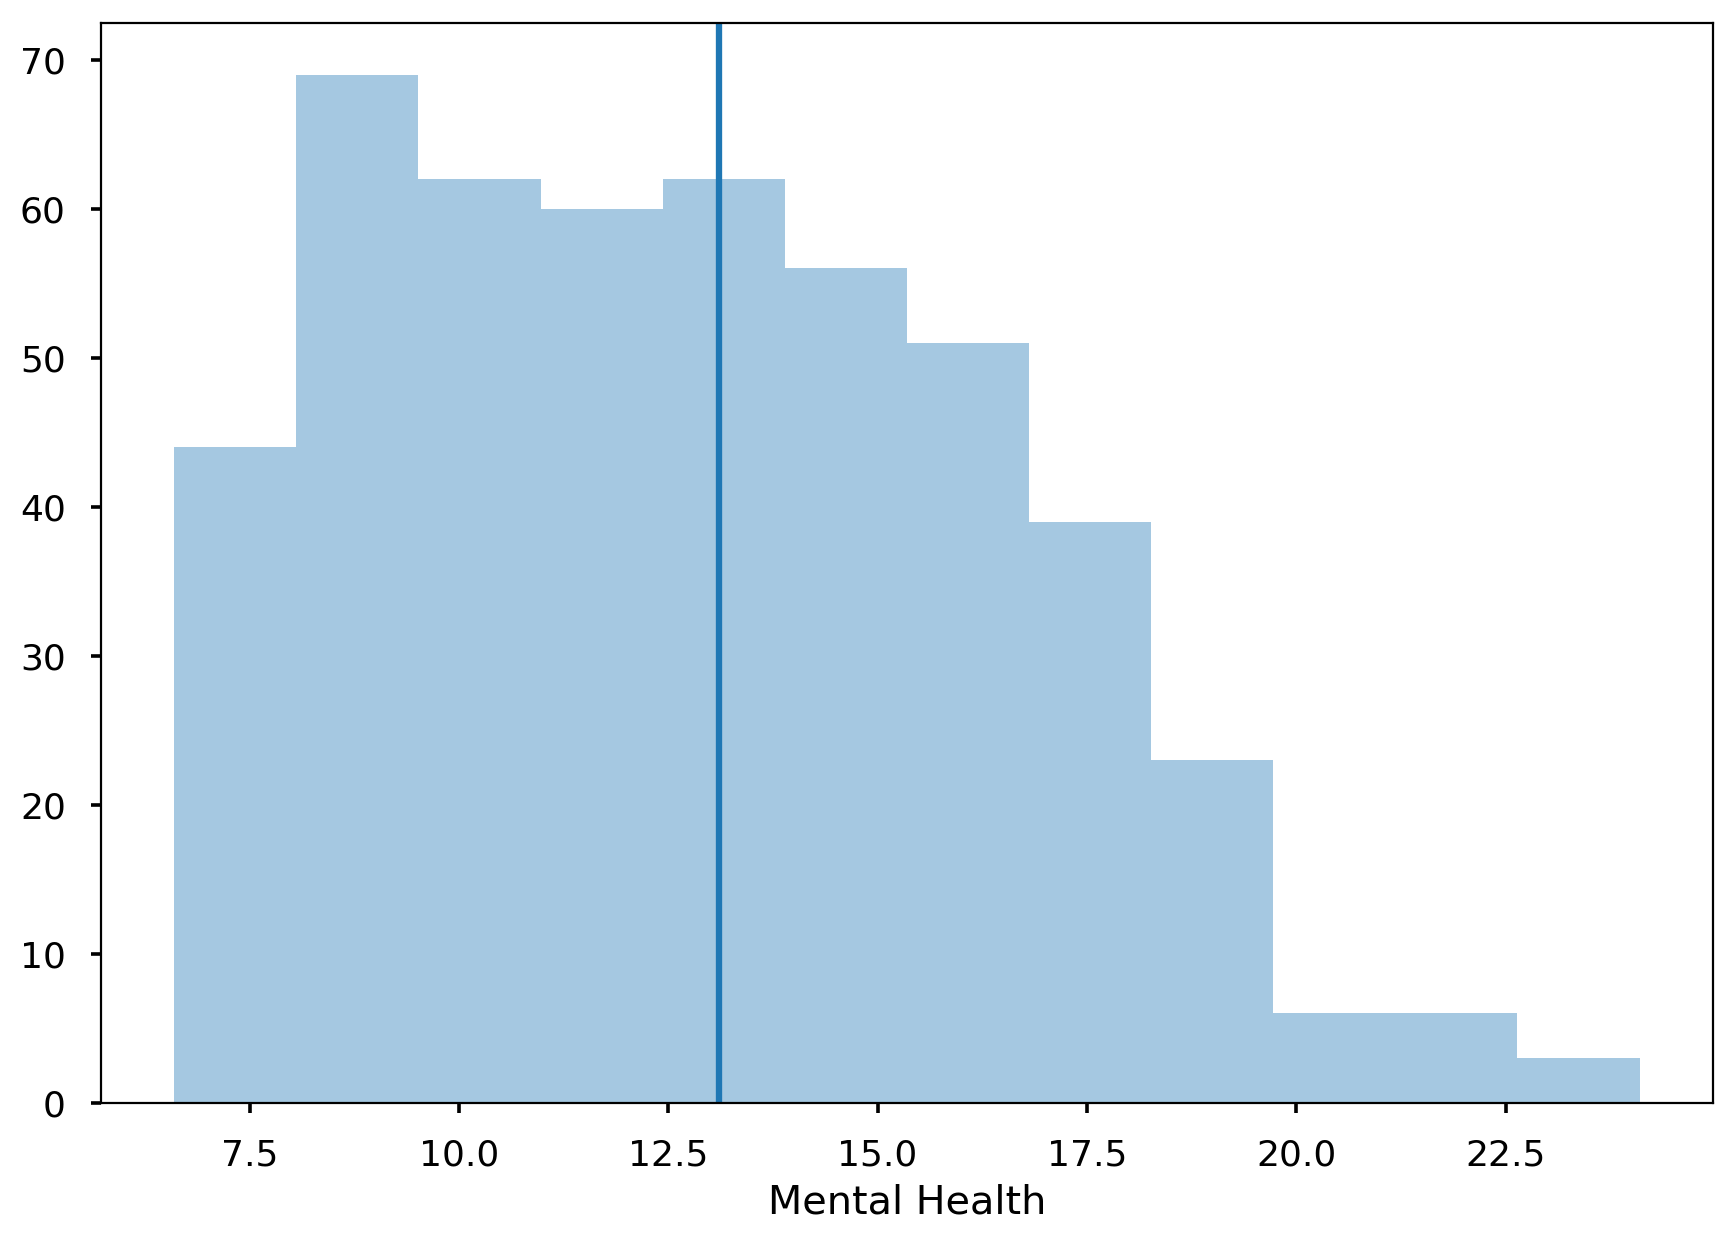

In [16]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('seaborn-talk')

plt.figure(dpi=200)
sns.distplot(dmv_tracts['Mental Health'], kde=False) # Histogram of mental health
plt.axvline(x = avg_mh)
plt.show() # We can see that mental health for communities across our cities is normally distributed

In [9]:
high_prev = dmv_tracts[dmv_tracts['Mental Health'] > avg_mh] #above average prevelance of poor mental health (Worse)
low_prev = dmv_tracts[dmv_tracts['Mental Health'] < avg_mh] #below average prevelance of poor mental health (Good)

In [10]:
# Create dataframe that treats the tracts with above average prevelance as a signle city
dmv_high = pd.DataFrame(index=cities)
for city in cities:
    temp_df = high_prev[high_prev['City'] == city]
    
    for q in questions:
        dmv_high.loc[city, q] = temp_df[q].mean()
    dmv_high.loc[city, 'Population'] = temp_df['Population'].sum() #Sum population, mean everything else

dmv_high

,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Diabetes,Health Insurance,High Blood Pressure,High Cholesterol,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
Baltimore,371894.0,77.937302,29.293651,14.468254,5.248413,73.305556,3.942063,59.919048,8.827778,29.433333,28.754400,7.315079,13.693651,26.313492,45.978571,16.212698,15.973810,43.171429,36.705556,83.923016,16.226190,40.873016,NaN,15.000794,34.664286,46.973810,5.291270,78.419841,25.796032
Richmond,115946.0,75.180556,25.163889,14.502778,4.622222,68.675000,3.850000,57.286111,8.330556,24.327778,27.250000,6.780556,11.638889,25.233333,51.002778,15.727778,22.086111,39.636111,35.036111,84.163889,16.591667,39.497222,83.025000,15.800000,34.011111,43.819444,5.130556,76.669444,27.855556
Washington,163618.0,81.807692,23.280769,18.188462,4.396154,71.590385,3.800000,57.100000,8.328846,21.126923,19.853846,5.921154,13.032692,27.459615,57.657692,14.242308,12.703846,38.690385,34.676923,82.032692,15.994231,36.046154,86.244231,14.405769,28.053846,45.421154,5.117308,74.598077,28.653846
Alexandria,11128.0,64.950000,14.400000,18.900000,2.700000,66.500000,2.150000,57.400000,4.500000,31.650000,29.550000,3.200000,9.050000,20.900000,52.600000,7.600000,25.950000,22.750000,26.700000,82.000000,14.350000,30.700000,84.150000,11.350000,25.800000,36.800000,1.950000,62.500000,19.350000


In [11]:
# Create dataframe that treats the tracts with below average prevelance as a signle city
dmv_low = pd.DataFrame(index=cities)
for city in cities:
    temp_df = low_prev[low_prev['City'] == city]
    
    for q in questions:
        dmv_low.loc[city, q] = temp_df[q].mean()
    dmv_low.loc[city, 'Population'] = temp_df['Population'].sum()

dmv_low

,Population,Annual Checkup,Arthritis,Binge Drinking,Cancer (except skin),Cholesterol Screening,Chronic Kidney Disease,Colorectal Cancer Screening,COPD,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Diabetes,Health Insurance,High Blood Pressure,High Cholesterol,Mammography,Mental Health,Obesity,Pap Smear Test,Physical Health,Physical Inactivity,Sleep <7 hours,Stroke,Taking BP Medication,Teeth Loss
Baltimore,249045.0,74.439726,22.958904,20.013699,5.789041,78.300000,2.557534,70.975342,5.212329,41.931507,39.394521,5.189041,10.436986,16.256164,66.986301,9.358904,8.450685,31.186301,31.924658,83.469863,11.008219,28.009589,NaN,8.889041,20.623288,37.472603,2.836986,74.705479,11.304110
Richmond,88268.0,72.286667,19.993333,20.496667,5.663333,77.943333,2.343333,70.423333,4.583333,37.486667,39.970000,4.653333,8.450000,14.416667,75.000000,8.256667,9.823333,27.903333,30.976667,84.013333,10.380000,25.910000,84.643333,8.713333,17.926667,33.293333,2.440000,75.176667,10.070000
Washington,438072.0,78.500000,17.294444,25.419048,5.062698,79.944444,2.394444,70.316667,4.295238,33.054762,29.871429,4.065873,9.286508,14.491270,79.366667,7.929365,6.361111,26.631746,30.176984,82.235714,9.503175,22.843651,87.677778,7.732540,14.438095,34.404762,2.565079,72.916667,10.788095
Alexandria,128838.0,71.769444,18.916667,19.388889,5.452778,81.394444,2.066667,73.063889,3.780556,44.336111,41.566667,3.847222,7.947222,12.325000,73.905556,6.969444,9.861111,26.180556,30.538889,83.052778,9.336111,24.186111,86.994444,8.038889,15.613889,30.811111,1.925000,73.663889,8.280556


In [12]:
# We use these functions to compare each city in the 500 cities dataset to our 8 sub-cities
def above_match(row):
    scores = []
    for i in questions:
        if row[i] < dmv_high.loc[city,i]:
            scores.append(row[i]/dmv_high.loc[city,i])
        if row[i] > dmv_high.loc[city,i]:
            scores.append(dmv_high.loc[city,i]/row[i])
        else:
            scores.append(1)
    return np.mean(scores)

def below_match(row):
    scores = []
    for i in questions:
        if row[i] < dmv_low.loc[city,i]:
            scores.append(row[i]/dmv_low.loc[city,i])
        if row[i] > dmv_low.loc[city,i]:
            scores.append(dmv_low.loc[city,i]/row[i])
        else:
            scores.append(1)
    return np.mean(scores)

for i in cities:
    city = i
    cities_df[f"{city} (High)"] = cities_df.apply(above_match, axis=1)
    cities_df[f"{city} (Low)"] = cities_df.apply(below_match, axis=1)
    

cities_df.iloc[:,[0,1,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]].head()

,City,State,Richmond,Alexandria,Washington,Baltimore,Baltimore (High),Baltimore (Low),Richmond (High),Richmond (Low),Washington (High),Washington (Low),Alexandria (High),Alexandria (Low)
284,Washington,DC,0.896468,0.877937,1.000000,0.891784,0.841148,0.936295,0.828985,0.917599,0.837967,0.932330,0.830889,0.866643
410,Boston,MA,0.902884,0.879174,0.952447,0.900622,0.854492,0.918261,0.849384,0.904729,0.860819,0.912299,0.858474,0.870044
77,Portland,OR,0.890651,0.896876,0.938656,0.886183,0.835307,0.925531,0.824687,0.924112,0.839738,0.924867,0.849147,0.893693
470,Minneapolis,MN,0.878043,0.931552,0.935976,0.861856,0.822987,0.923235,0.816020,0.936802,0.828020,0.936777,0.867170,0.917507
84,Charlotte,NC,0.918612,0.886028,0.935973,0.902795,0.850807,0.935271,0.845681,0.905737,0.852467,0.894077,0.856004,0.866299


In [13]:
# City_indexes is used to loop through the indexes while making the summary column
city_indexes = [column for column in cities_df.columns if 'Washington' in column or 'Baltimore' in column or 
                                                            'Richmond' in column or  'Alexandria' in column]

# Create a dataframe that shows which cities are most similar to each other
mirrors = pd.DataFrame(index=city_indexes)
for i in city_indexes:
    for num in range(500):

        # adds the closest city matches
        mirrors.loc[i,f"City {num}"] = (f"{cities_df.sort_values(i, ascending=False).reset_index().loc[num,'City']}, "
                                        f"{cities_df.sort_values(i, ascending=False).reset_index().loc[num,'State']}"
                                       )
        # adds the percent that each city is similar
        mirrors.loc[i,num] = round(cities_df.sort_values(i, ascending=False).reset_index().loc[num,i],3)
        
mirrors.iloc[:,0:12]

,City 0,0,City 1,1,City 2,2,City 3,3,City 4,4,City 5,5
Richmond,"Richmond, VA",1.000,"Fayetteville, NC",0.966,"Newport News, VA",0.964,"Baton Rouge, LA",0.964,"Norfolk, VA",0.960,"Modesto, CA",0.956
Alexandria,"Alexandria, VA",1.000,"Cary, NC",0.966,"Allen, TX",0.962,"Olathe, KS",0.959,"Sandy Springs, GA",0.956,"Frisco, TX",0.955
Washington,"Washington, DC",1.000,"Boston, MA",0.952,"Portland, OR",0.939,"Minneapolis, MN",0.936,"Charlotte, NC",0.936,"St. Paul, MN",0.932
Baltimore,"Baltimore, MD",1.000,"Cincinnati, OH",0.957,"New Orleans, LA",0.955,"Philadelphia, PA",0.953,"Kansas City, MO",0.950,"Nashville, TN",0.950
Baltimore (High),"Albany, GA",0.952,"Buffalo, NY",0.950,"Memphis, TN",0.949,"Cleveland, OH",0.949,"Shreveport, LA",0.948,"Birmingham, AL",0.947
Baltimore (Low),"Virginia Beach, VA",0.950,"Charleston, SC",0.948,"Vacaville, CA",0.947,"Murrieta, CA",0.942,"Chandler, AZ",0.942,"Lincoln, NE",0.940
Richmond (High),"Albany, GA",0.957,"Trenton, NJ",0.957,"Lauderhill, FL",0.950,"Hartford, CT",0.949,"Hammond, IN",0.945,"Jackson, MS",0.945
Richmond (Low),"Murrieta, CA",0.969,"Brooklyn Park, MN",0.968,"San Mateo, CA",0.962,"Redwood City, CA",0.962,"Sandy Springs, GA",0.960,"Temecula, CA",0.960
Washington (High),"Syracuse, NY",0.936,"Paterson, NJ",0.933,"Springfield, MA",0.933,"Hartford, CT",0.932,"Akron, OH",0.931,"Newark, NJ",0.930
Washington (Low),"Minneapolis, MN",0.937,"Madison, WI",0.933,"Washington, DC",0.932,"San Francisco, CA",0.931,"Evanston, IL",0.929,"Rancho Cucamonga, CA",0.929


Here we can see which cities are the most similar to our cities and their census tracts. Even without specific knowledge of each city, we can get an idea of how significant the disparities in health are. For example, we can see that Alexandria (Low) has itself as its second closest match and Washington (low) has itself as third. This means that most of the census tracts in these cities have better than average mental health. Now, lets use this data to visualize the difference in health between the halves of each city.

In [14]:
df = mirrors.transpose()
df = df.loc[range(500)]
df = df.reset_index()

df.to_csv('../Data/MirrorScores.csv', index=False) # Export data
df.head()

,index,Richmond,Alexandria,Washington,Baltimore,Baltimore (High),Baltimore (Low),Richmond (High),Richmond (Low),Washington (High),Washington (Low),Alexandria (High),Alexandria (Low)
0,0,1,1,1,1,0.952,0.95,0.957,0.969,0.936,0.937,0.919,0.975
1,1,0.966,0.966,0.952,0.957,0.95,0.948,0.957,0.968,0.933,0.933,0.907,0.975
2,2,0.964,0.962,0.939,0.955,0.949,0.947,0.95,0.962,0.933,0.932,0.906,0.952
3,3,0.964,0.959,0.936,0.953,0.949,0.942,0.949,0.962,0.932,0.931,0.903,0.951
4,4,0.96,0.956,0.936,0.95,0.948,0.942,0.945,0.96,0.931,0.929,0.902,0.951


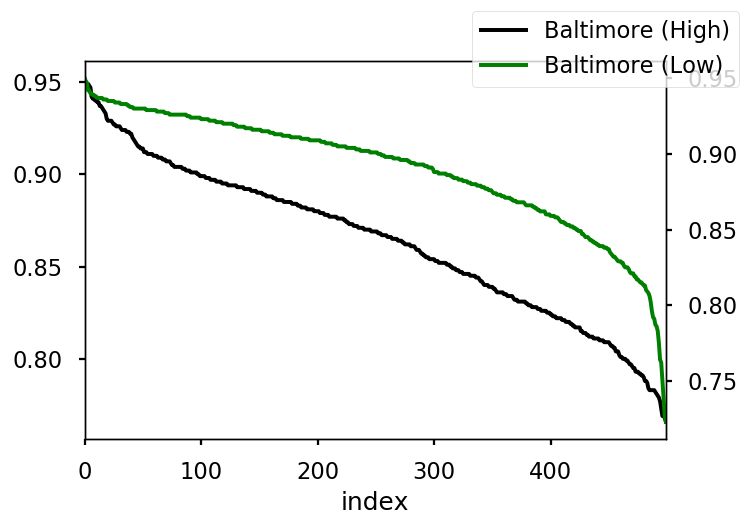

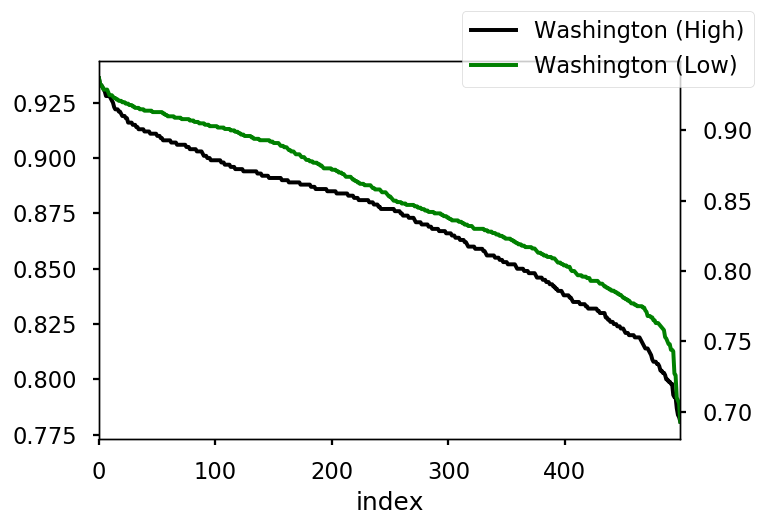

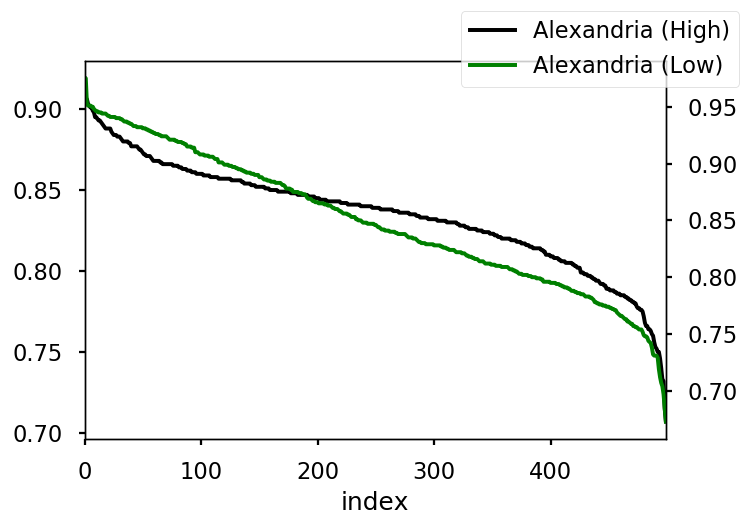

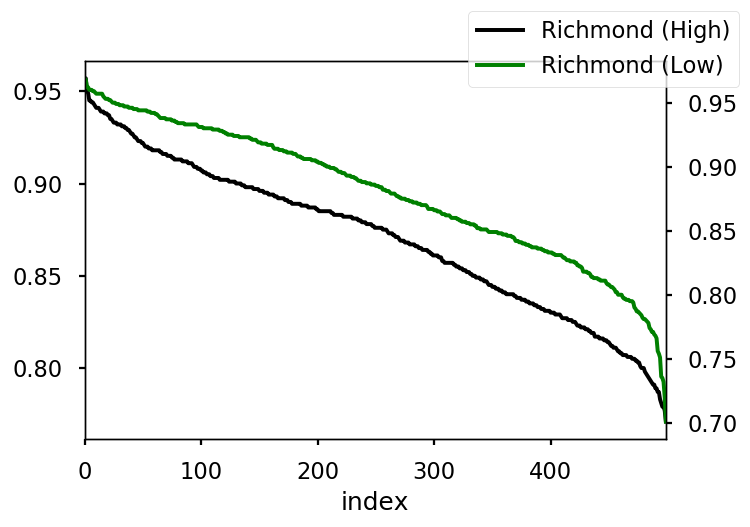

In [15]:
# Here we graph how the similarity score changes as we move down the dataset

import matplotlib as mpl; mpl.rcParams['figure.dpi'] = 125

ax = df.plot(x="index", y="Baltimore (High)", color='black', legend=False)
ax2 = ax.twinx()
df.plot(x="index", y="Baltimore (Low)", ax=ax2, legend=False, color="g")
ax.figure.legend()

ax = df.plot(x="index", y="Washington (High)", color='black', legend=False)
ax2 = ax.twinx()
df.plot(x="index", y="Washington (Low)", ax=ax2, legend=False, color="g")
ax.figure.legend()

ax = df.plot(x="index", y="Alexandria (High)", color='black', legend=False)
ax2 = ax.twinx()
df.plot(x="index", y="Alexandria (Low)", ax=ax2, legend=False, color="g")
ax.figure.legend()

ax = df.plot(x="index", y="Richmond (High)", color='black', legend=False)
ax2 = ax.twinx()
df.plot(x="index", y="Richmond (Low)", ax=ax2, legend=False, color="g")
ax.figure.legend()


plt.show()

These graphs show that Baltimore and Richmond have the greatest disparities in health outcomes while Alexandria has the samllest. Of couse, that's not to say that there aren't large differences in health outcomes between the city's wealthy and low-income residents. It simply means that low-income Alexandrians make up a relatively small percentage of the population.